In [3]:
from src.keyword_generator import KeywordGenerator
import os
import pathlib

from dotenv import load_dotenv, find_dotenv
from openai import OpenAI

import pandas as pd


In [2]:
kw_generator = KeywordGenerator(model='gpt-3.5-turbo')
keys = kw_generator.get_kwds('AI',3)

In [3]:
keys

'artificial intelligence, machine learning, neural networks'

In [10]:
LL = keys.split(', ')

In [ ]:
keys = kw_generator.get_kwds('Living lab',40)
LL = keys.split(', ')
for w in LL:
    keys = kw_generator.get_kwds(w,100)
    kw_list = 


In [4]:
sun = ['sun', 'cloud', 'rain', 'hot']
cloud = ['cloud','grey','sad','sun','weather']
rain = ['rain','water','cloud','cold','weather']
hot = ['hot','sun','temperature','cold','warm']


W = []
for w in sun:
    W.extend(eval(w))

W_unique = []

for x in W:
    if x not in W_unique:
        W_unique.append(x)

print(W)
print(W_unique)
 

['sun', 'cloud', 'rain', 'hot', 'cloud', 'grey', 'sad', 'sun', 'weather', 'rain', 'water', 'cloud', 'cold', 'weather', 'hot', 'sun', 'temperature', 'cold', 'warm']
['sun', 'cloud', 'rain', 'hot', 'grey', 'sad', 'weather', 'water', 'cold', 'temperature', 'warm']


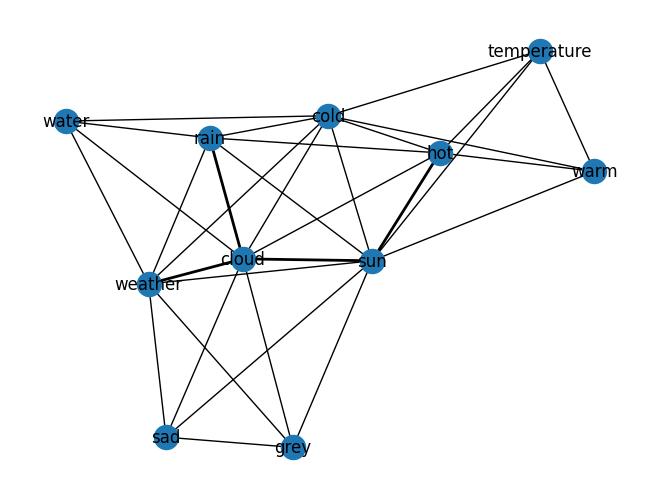

In [5]:
import networkx as nx
G = nx.Graph()

lists = [sun, cloud, rain, hot]
for lst in lists:
    for i, node1 in enumerate(lst):
        for node2 in lst[i + 1:]:
            if G.has_edge(node1, node2):
                G[node1][node2]['weight'] += 1
            else:
                G.add_edge(node1, node2, weight=1)

edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, with_labels=True, width=edge_widths)

In [6]:
pagerank_scores = nx.pagerank(G)

In [25]:
personalization = {node: 0 for node in G.nodes()} 
personalization['sun'] = 1 
pagerank_scores = nx.pagerank(G, personalization=personalization)

scores = pagerank_scores
sorted_scores = sorted(scores.items(), key=lambda x:x[1], reverse = True)
sorted_scores

[('sun', 0.26618916753194544),
 ('cloud', 0.13090793902510914),
 ('hot', 0.09322911014747055),
 ('cold', 0.0921225191118862),
 ('weather', 0.09035432443196639),
 ('rain', 0.07983903352241507),
 ('temperature', 0.052923919802869784),
 ('warm', 0.052923919802869784),
 ('grey', 0.05115572512294997),
 ('sad', 0.05115572512294997),
 ('water', 0.03919861637756759)]